Author: Cesar O. Maldonado-Mercado 

Date:   27-Feb-2017

Email:  cesar.maldonado.mercado@gmail.com

License: Belongs to Nearshore Delivery Solutions


1) Comenzamos por cargar las librerías necesarias 

In [2]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import pylab
sns.set(style="whitegrid", color_codes=True)
from matplotlib.pyplot import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
%matplotlib inline

//anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


2) Ahora cargamos los datos:

In [3]:
gedata = pd.read_csv('../files/blade_damage_assessment.csv')

//anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (8,9,12,13,14) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


3) Podemos ver que el archivo .csv fue leído como un pandas dataframe

In [4]:
type(gedata)

pandas.core.frame.DataFrame

5) Ahora veamos el encabezado y la cola:

In [5]:
gedata.head(n=2) 

,engine_id,customer,engine_type,category,damage,flight_id,t_1,t_2,t_3,t_4,t_oil,p_oil,vibrations_2,vibrations_4,core_speed,fan_speed,thrust
0,700000,ACC,EX-50B,non-failed,38,1,27.169333,97.409398,568.554307180454,800.617771526119,73.664163,59.755336,0.0844030348911414,0.288484308226124,103.988490040037,86.759646,43824.077117
1,700000,ACC,EX-50B,non-failed,38,2,34.423444,131.146137,709.525734761479,904.861162536342,83.995234,91.238090,0.11583599227328,0.260483903090653,110.245548851895,92.174964,48131.620917


In [6]:
gedata.tail(n=2)

,engine_id,customer,engine_type,category,damage,flight_id,t_1,t_2,t_3,t_4,t_oil,p_oil,vibrations_2,vibrations_4,core_speed,fan_speed,thrust
1961394,701996,ASI,EX-50B,non-failed,22,3606,34.518846,118.730542,657.278219025567,987.35059838155,77.225804,85.625504,0.0499146257522463,0.356357547811982,106.263538432885,88.607671,48747.376156
1961395,701996,ASI,EX-50B,non-failed,22,3607,22.662030,95.470234,638.901681990088,938.289772231049,76.074649,96.538556,0.642193101797019,0.537164142206192,105.454228819442,88.443708,48741.133212


6) Carguemos una figura que nos muestra lo que significan los parámetros <img src="turbina_ge.jpg">

7) Si quisieramos cambiar algunos nombres esto es muy fácil:

In [7]:
data=gedata.rename(columns={'engine_id': 'id', 'customer': 'cliente','engine_type':'tipo',
                           'category':'cat','flight_id':'vuelo','t_1':'t1','t_2':'t2',
                         't_3':'t3',
                           't_4':'t4','t_oil':'ta','p_oil':'pa','vibrations_2':'v2',
                            'vibrations_4':'v4','core_speed':'velcore','fan_speed':'velfan',
                            'thrust':'empuje'  })

8) Podemos ver los cambios reflejados:

In [8]:
data.head(n=0)

,id,cliente,tipo,cat,damage,vuelo,t1,t2,t3,t4,ta,pa,v2,v4,velcore,velfan,empuje


9) Vemos que hay variables categóricas, quisiera ver que valores toman:

In [15]:
np.unique(data[['id']])

array([700000, 700002, 700008, 700010, 700011, 700028, 700029, 700034,
       700042, 700049, 700059, 700065, 700080, 700085, 700086, 700087,
       700091, 700107, 700108, 700119, 700133, 700135, 700141, 700143,
       700146, 700150, 700162, 700170, 700172, 700176, 700185, 700187,
       700190, 700191, 700192, 700199, 700201, 700205, 700207, 700230,
       700234, 700236, 700243, 700249, 700251, 700268, 700272, 700274,
       700286, 700289, 700291, 700292, 700306, 700311, 700318, 700321,
       700325, 700330, 700332, 700335, 700337, 700338, 700348, 700349,
       700375, 700377, 700381, 700384, 700386, 700389, 700393, 700397,
       700400, 700411, 700415, 700416, 700417, 700424, 700428, 700430,
       700431, 700434, 700435, 700439, 700440, 700449, 700454, 700470,
       700475, 700477, 700482, 700483, 700488, 700498, 700500, 700503,
       700504, 700507, 700508, 700516, 700519, 700520, 700522, 700533,
       700536, 700537, 700538, 700539, 700540, 700544, 700546, 700556,
      

In [10]:
np.unique(data[['cliente']])

array(['ACC', 'ASI', 'DME', 'FAR', 'SLA'], dtype=object)

In [11]:
np.unique(data[['tipo']])

array(['EX-50A', 'EX-50B'], dtype=object)

In [12]:
np.unique(data[['cat']])

array(['failed', 'non-failed'], dtype=object)

In [13]:
np.unique(data[['damage']])

array([ 4,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 40,
       41, 43, 44, 46, 50, 51, 53, 55, 57, 58, 59, 60, 61, 62, 63, 64, 65,
       66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 80, 82, 83])

In [14]:
np.unique(data[['vuelo']])

array([   1,    2,    3, ..., 7783, 7784, 7785])

10) Ahora defino un nuevo data frame reducido para trabajar sin las variables categóricas de tipo de motor y cliente, y solo conservando el target del modelo en la variable 'cat'

In [16]:
data1= data[ ['damage', 't1', 't2','t3','t4','ta','pa','v2','v4','velcore','velfan','empuje','cat'] ]

11) Comienzo a explorar los valores de los datos, quisiera por ejemplo ver el promedio de la temperatura t2

In [17]:
data1['t2'].mean()

94.72916584923271

12) Puedo ver la cantidad de datos que tengo

In [18]:
data1.shape

(1961396, 13)

13) Tal vez solo quiero contar cuantas entradas hay en una columna:

In [19]:
data['cat'].count()

1961396

14) Puedo ver si hay datos nulos y en que columna:

In [23]:
data1.isnull().any()

damage     False
t1         False
t2         False
t3         False
t4         False
ta         False
pa         False
v2         False
v4         False
velcore    False
velfan     False
empuje     False
cat        False
dtype: bool

In [21]:
data1.isnull().sum().sum()

0

15) Ahora puedo agrupar en las categorías de 'failed' y  'non-failed' y ver los promedios de los valores en cada grupo:

In [24]:
data1.groupby('cat').mean()

,damage,t1,t2,ta,pa,velfan,empuje
cat,,,,,,,
failed,64.869973,26.557995,97.210312,69.991314,79.973346,90.294014,46980.378652
non-failed,25.049676,24.300486,94.056068,70.001452,80.002733,85.949997,43899.594358


Salta a la vista que el 'damage' es mucho mayor para los que si fallaron, cómo era de esperarse.

16) En lo que sigue estaremos trabajando con una muestra aleatoria del data set para facilitar la visualización

In [26]:
muestra = data.sample(frac=0.001)

In [27]:
muestra['id'].count()

1961

17) Ahora queremos formar dos subconjuntos de la prueba: los "buenos" y los "malos".

In [28]:
malos = muestra[muestra['cat'].isin(['failed'])]

buenos = muestra[muestra['cat'].isin(['non-failed'])]

18) Veamos algunas gráficas. Comenzamos por explorar hasta que punto el damage divide los buenos de los malos:

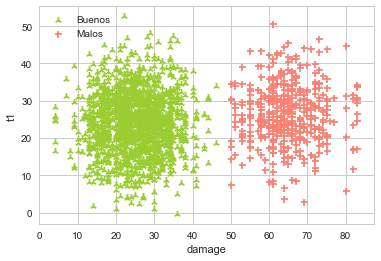

In [29]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(buenos['damage'], buenos['t1'] ,c='yellowgreen', marker='2', label='Buenos')
ax.scatter(malos['damage'] , malos['t1'] ,c='salmon', marker='+', label='Malos')
ax.legend()
ax.set_xlabel('damage')
ax.set_ylabel('t1')

Hemos establecido que el nivel de damage de 48 divide a casi todos los casos de buenos y malos excepto algunas anomalías. 

19) Ahora veamos como influye el tipo de motor, tenemos loas A y los B:

In [43]:
A = muestra[muestra['tipo'].isin(['EX-50A'])]
B = muestra[muestra['tipo'].isin(['EX-50B'])]

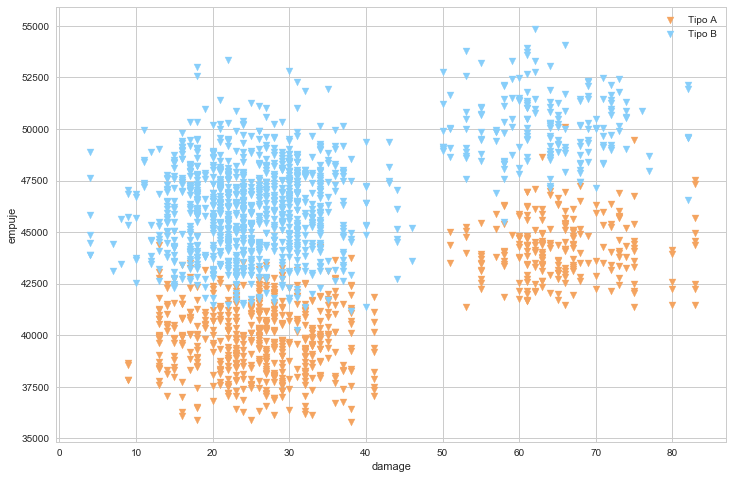

In [44]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(A['damage'], A['empuje'], c='sandybrown', marker='v', label='Tipo A')
ax.scatter(B['damage'], B['empuje'], c='lightskyblue', marker='v', label='Tipo B')
ax.legend()
ax.set_xlabel('damage')
ax.set_ylabel('empuje')

Observamos que el tipo de motor influye en el empuje pero no en el damage y por lo tanto no en la posibilidad de falla

In [46]:
ACC = muestra[muestra['cliente'].isin(['ACC'])]
ASI = muestra[muestra['cliente'].isin(['ASI'])]
DME = muestra[muestra['cliente'].isin(['DME'])]
FAR = muestra[muestra['cliente'].isin(['FAR'])]
SLA = muestra[muestra['cliente'].isin(['SLA'])]



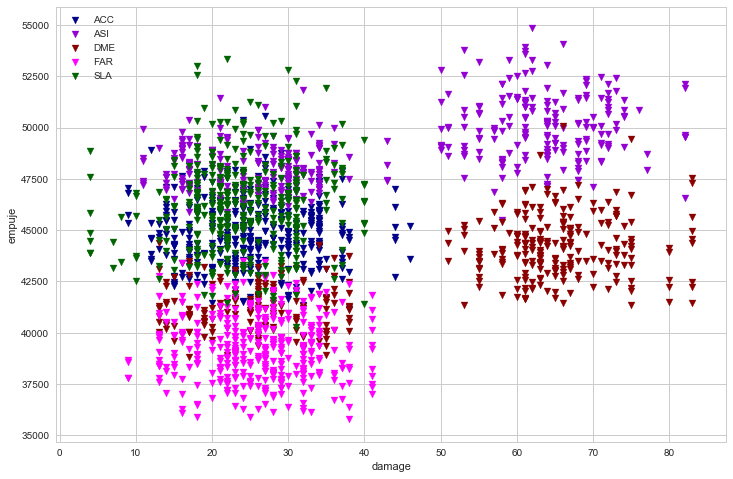

In [47]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(ACC['damage'], ACC['empuje'], c='darkblue', marker='v', label='ACC')
ax.scatter(ASI['damage'], ASI['empuje'], c='darkviolet', marker='v', label='ASI')
ax.scatter(DME['damage'], DME['empuje'], c='darkred', marker='v', label='DME')
ax.scatter(FAR['damage'], FAR['empuje'], c='magenta', marker='v', label='FAR')
ax.scatter(SLA['damage'], SLA['empuje'], c='darkgreen', marker='v', label='SLA')
ax.legend()
ax.set_xlabel('damage')
ax.set_ylabel('empuje')

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(buenos['damage'], buenos['vuelo'], c='yellowgreen', marker='2', label='Buenos')
ax.scatter(malos['damage'], malos['vuelo'], c='salmon', marker='+', label='Malos')
ax.legend()
ax.set_xlabel('damage')
ax.set_ylabel('No. vuelo')

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(buenos['damage'], buenos['id'], c='yellowgreen', marker='2', label='Buenos')
ax.scatter(malos['damage'], malos['id'], c='salmon', marker='+', label='Malos')
ax.legend()
ax.set_xlabel('damage')
ax.set_ylabel('i d')

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(buenos['t1'], buenos['t2'], c='yellowgreen', marker='2', label='Buenos')
ax.scatter(malos['t1'], malos['t2'], c='salmon', marker='+', label='Malos')
ax.legend()
ax.set_xlabel('t1')
ax.set_ylabel('t2')

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(buenos['velcore'], buenos['empuje'], c='yellowgreen', marker='2', label='Buenos')
ax.scatter(malos['velcore'], malos['empuje'], c='salmon', marker='+', label='Malos')
ax.legend()
ax.set_xlabel('velcore')
ax.set_ylabel('empuje')

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(buenos['velfan'], buenos['empuje'], c='yellowgreen', marker='2', label='Buenos')
ax.scatter(malos['velfan'], malos['empuje'], c='salmon', marker='+', label='Malos')
ax.legend()
ax.set_xlabel('velfan')
ax.set_ylabel('empuje')

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(buenos['velfan'], buenos['empuje'], c='yellowgreen', marker='2', label='Buenos')
ax.scatter(malos['velfan'], malos['empuje'], c='salmon', marker='+', label='Malos')
ax.legend()
ax.set_xlabel('velfan')
ax.set_ylabel('empuje')

In [ ]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

In [ ]:
plot_corr(data1)

In [ ]:
data.head(n=3)

In [ ]:
arriba = prueba[prueba['tipo'].isin(['EX-50B'])]

In [ ]:
arriba.head(n=2)

In [ ]:

prueba2 = data.sample(frac=0.1)

arriba = prueba[prueba['tipo'].isin(['EX-50B'])]

abajo = prueba[~prueba['tipo'].isin(['EX-50B'])]

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(arriba['velcore'], arriba['empuje'], c='yellowgreen', marker='2', label='Arriba')
ax.scatter(abajo['velcore'], abajo['empuje'], c='salmon', marker='+', label='Abajo')
ax.legend()
ax.set_xlabel('velcore')
ax.set_ylabel('empuje')

In [ ]:

fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(arriba['velcore'], arriba['empuje'], c='yellowgreen', marker='v', label='Arriba')
ax.legend()
ax.set_xlabel('velcore')
ax.set_ylabel('empuje')

In [ ]:
malos_arriba = arriba[arriba['cat'].isin(['failed'])]

buenos_arriba = arriba[arriba['cat'].isin(['non-failed'])]

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(buenos_arriba['velcore'], buenos_arriba['empuje'], c='yellowgreen', marker='2', label='Buenos')
ax.scatter(malos_arriba['velcore'], malos_arriba['empuje'], c='salmon', marker='+', label='Malos')
ax.legend()
ax.set_xlabel('velcore')
ax.set_ylabel('empuje')

In [ ]:
malos_abajo = abajo[abajo['cat'].isin(['failed'])]

buenos_abajo = abajo[abajo['cat'].isin(['non-failed'])]

In [ ]:
fig, ax = plt.subplots(figsize=(6,4))
ax.scatter(buenos_abajo['velcore'], buenos_abajo['empuje'], c='yellowgreen', marker='2', label='Buenos')
ax.scatter(malos_abajo['velcore'], malos_abajo['empuje'], c='salmon', marker='+', label='Malos')
ax.legend()
ax.set_xlabel('velcore')
ax.set_ylabel('empuje')

In [ ]:
dataset_prep = abajo[['velcore', 'empuje','cat']]

In [ ]:

reg_log = LogisticRegression()
features = dataset_prep[['velcore', 'empuje']]

features_train, features_test, target_train, target_test = train_test_split(features, dataset_prep['cat'])
reg_log.fit(features_train, target_train)
predictions = reg_log.predict(features_test)

In [ ]:
reg_log.score(X = features_test ,
                y = target_test)

In [ ]:



f, (ax1, ax2) = plt.subplots(2, 1, sharex='col', sharey='row',figsize=(6,8))
ax1.scatter(arriba['velcore'], arriba['empuje'], c='yellowgreen', marker='2', label='Arriba')
ax1.scatter(abajo['velcore'], abajo['empuje'], c='salmon', marker='+', label='Abajo')
ax1.set_title('Sharing x per column, y per row')
ax2.scatter(buenos_arriba['velcore'], buenos_arriba['empuje'], c='yellowgreen', marker='2', label='Buenos')
ax2.scatter(malos_arriba['velcore'], malos_arriba['empuje'], c='salmon', marker='+', label='Malos')


In [ ]:
asdfsdf

sdfsdaf

\h


In [ ]:
v

dsfasdfsf



In [ ]:
safdfasdf